## Synthetic textures dataset

We make use of pretrained stable diffusion model from DressCode paper to generate synthetic textures. This model takes a text prompt in the form `color - material - pattern` and generates a texture image. For each type of input ([colour](/home/cizinsky/garment-texture-completion/src/data_generation/dresscode/queries/colours.txt), [materials](/home/cizinsky/garment-texture-completion/src/data_generation/dresscode/queries/materials.txt), [patterns](/home/cizinsky/garment-texture-completion/src/data_generation/dresscode/queries/patterns.txt)), we use GPT4o, to generate a list of 30 unique values. 

In [27]:
import os
import random

from matplotlib import pyplot as plt

### Qualitative assessment of the generated textures

In total, there are 27775 texture samples in the synthetic dataset.


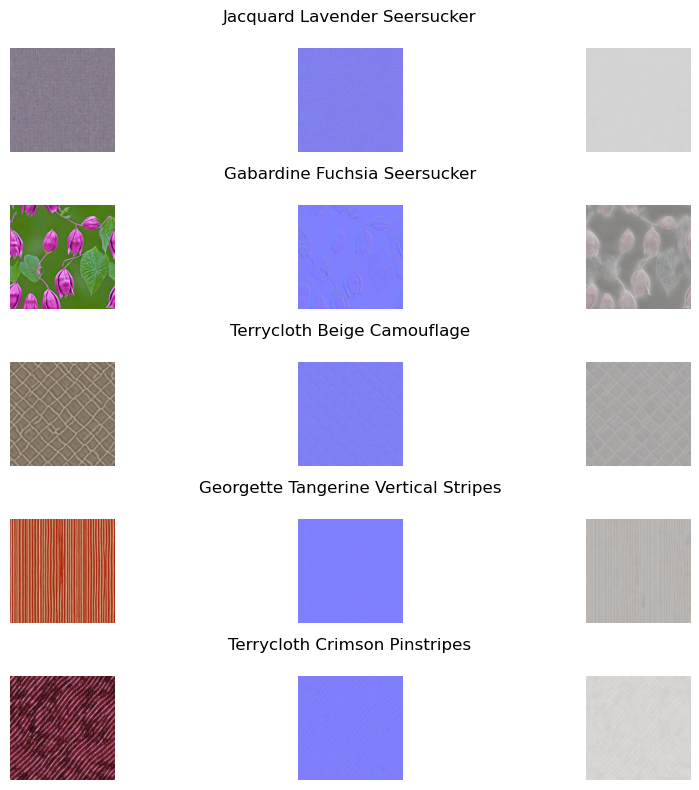

In [45]:
data_path = "/scratch/izar/cizinsky/pbr_dresscode"

folders = os.listdir(data_path)
print(f"In total, there are {len(folders)} texture samples in the synthetic dataset.")

subset = random.choices(folders, k=5)
fig, axs = plt.subplots(5, 3, figsize=(10, 8))
for ax_row, folder in zip(axs, subset):

    for ax, texture_type in zip(ax_row, ["diffuse", "normal", "roughness"]):
        texture_path = os.path.join(data_path, folder, f"texture_{texture_type}.png")
        img = plt.imread(os.path.join(texture_path))
        ax.imshow(img)
        ax.axis("off")
        if texture_type == "normal":
            prompt = " ".join(folder.split("_"))
            ax.set_title(f"{prompt}\n")

plt.tight_layout()